In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Statcast PBP/statcast_2024 (1).csv")

In [ ]:
df.sort_values('game_date',ascending=False) # Use sort_values to sort a DataFrame. Use True instead of TRUE

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
669780,FF,2024-09-19,96.4,-2.10,5.66,"Rocker, Kumar",664770,677958,NaN,foul,...,0,0,0,Standard,Standard,228.0,0.000,-0.033,69.72750,7.09386
667397,CU,2024-09-19,77.2,-0.45,6.61,"Woods Richardson, Simeon",647304,680573,strikeout,swinging_strike,...,1,1,0,Infield shade,Standard,24.0,-0.020,-0.147,72.18510,7.28474
667408,CH,2024-09-19,79.9,0.37,5.86,"Cantillo, Joey",467793,676282,field_out,hit_into_play,...,1,0,1,Strategic,Standard,124.0,0.020,-0.139,74.28222,7.83487
667407,CH,2024-09-19,78.5,0.33,5.80,"Cantillo, Joey",668904,676282,NaN,ball,...,1,0,1,Strategic,Standard,124.0,0.000,0.016,NaN,NaN
667406,FF,2024-09-19,91.7,0.17,5.97,"Cantillo, Joey",668904,676282,NaN,ball,...,1,0,1,Strategic,Standard,161.0,0.000,0.026,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24965,ST,2024-03-28,78.3,-2.65,4.67,"Martinez, Seth",683011,661527,NaN,ball,...,4,2,4,Standard,Standard,91.0,0.000,0.083,NaN,NaN
24966,SI,2024-03-28,95.0,0.50,6.19,"Valdez, Framber",519203,664285,hit_by_pitch,hit_by_pitch,...,4,2,4,Standard,Standard,146.0,-0.090,0.999,NaN,NaN
24967,FF,2024-03-28,92.2,0.43,6.02,"Valdez, Framber",519317,664285,strikeout,swinging_strike,...,4,1,4,Standard,Standard,121.0,0.082,-0.484,NaN,NaN
24968,CU,2024-03-28,82.1,0.59,6.09,"Valdez, Framber",519317,664285,NaN,foul,...,4,1,4,Standard,Standard,325.0,0.000,0.000,NaN,NaN


In [ ]:
inn = df[['inning_topbot','inning']]
inn

,inning_topbot,inning
0,Bot,11
1,Bot,11
2,Bot,11
3,Bot,11
4,Bot,11
...,...,...
669776,Top,1
669777,Top,1
669778,Top,1
669779,Top,1


In [ ]:
rel_df = df[['game_date','player_name','release_pos_x','release_pos_z','home_team','away_team','inning','inning_topbot']]

rel_df

,game_date,player_name,release_pos_x,release_pos_z,home_team,away_team,inning,inning_topbot
0,2024-04-03,"Ferguson, Caleb",2.45,5.38,AZ,NYY,11,Bot
1,2024-04-03,"Ferguson, Caleb",2.45,5.35,AZ,NYY,11,Bot
2,2024-04-03,"Ferguson, Caleb",2.28,5.49,AZ,NYY,11,Bot
3,2024-04-03,"Ferguson, Caleb",2.32,5.51,AZ,NYY,11,Bot
4,2024-04-03,"Ferguson, Caleb",2.22,5.44,AZ,NYY,11,Bot
...,...,...,...,...,...,...,...,...
669776,2024-09-19,"Rocker, Kumar",-2.45,5.60,TEX,TOR,1,Top
669777,2024-09-19,"Rocker, Kumar",-2.06,5.86,TEX,TOR,1,Top
669778,2024-09-19,"Rocker, Kumar",-2.02,6.02,TEX,TOR,1,Top
669779,2024-09-19,"Rocker, Kumar",-2.37,5.62,TEX,TOR,1,Top


In [ ]:
# Assuming rel_df contains columns 'inning_topbot', 'home_team', 'away_team', and the relevant pitcher name column

# Define a function to determine the pitcher's team based on 'inning_topbot'
def determine_team(row):
    if row['inning_topbot'] == 'Top':
        return row['home_team']
    elif row['inning_topbot'] == 'Bot':
        return row['away_team']
    else:
        return None  # In case there's a missing or unexpected value

# Create a new column 'team' using the apply method
rel_df['team'] = rel_df.apply(determine_team, axis=1)

# Display the updated dataframe
rel_df


<ipython-input-22-2334c8e862a9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['team'] = rel_df.apply(determine_team, axis=1)


,game_date,player_name,release_pos_x,release_pos_z,home_team,away_team,inning,inning_topbot,team
0,2024-04-03,"Ferguson, Caleb",2.45,5.38,AZ,NYY,11,Bot,NYY
1,2024-04-03,"Ferguson, Caleb",2.45,5.35,AZ,NYY,11,Bot,NYY
2,2024-04-03,"Ferguson, Caleb",2.28,5.49,AZ,NYY,11,Bot,NYY
3,2024-04-03,"Ferguson, Caleb",2.32,5.51,AZ,NYY,11,Bot,NYY
4,2024-04-03,"Ferguson, Caleb",2.22,5.44,AZ,NYY,11,Bot,NYY
...,...,...,...,...,...,...,...,...,...
669776,2024-09-19,"Rocker, Kumar",-2.45,5.60,TEX,TOR,1,Top,TEX
669777,2024-09-19,"Rocker, Kumar",-2.06,5.86,TEX,TOR,1,Top,TEX
669778,2024-09-19,"Rocker, Kumar",-2.02,6.02,TEX,TOR,1,Top,TEX
669779,2024-09-19,"Rocker, Kumar",-2.37,5.62,TEX,TOR,1,Top,TEX


In [ ]:
rel_df.drop(['inning_topbot','home_team','away_team'],axis=1,inplace=True)

<ipython-input-23-1c186b59d53c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df.drop(['inning_topbot','home_team','away_team'],axis=1,inplace=True)


In [ ]:
# add 'estimated_woba_using_speedangle' from df to rel_df

rel_df['estimated_woba_using_speedangle'] = df['estimated_woba_using_speedangle']

<ipython-input-26-cc87060bffd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['estimated_woba_using_speedangle'] = df['estimated_woba_using_speedangle']


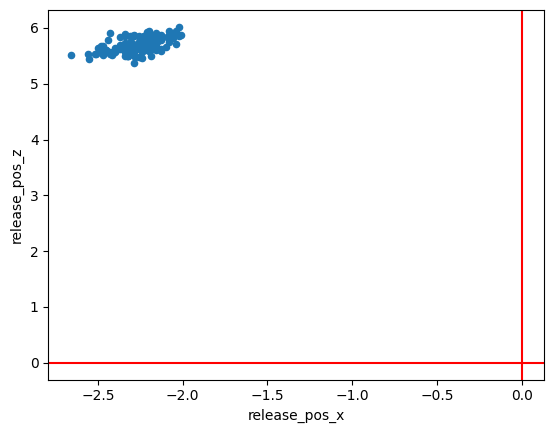

In [ ]:
# plot arm angle for kumar rocker using release_pos_x and z

rock_df = rel_df[rel_df['player_name'] == 'Rocker, Kumar']
rock_df

# plot arm angle with release pos and draw a line to the origin

rock_df.plot(x='release_pos_x',y='release_pos_z',kind='scatter')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')

In [ ]:
# invert the values in release_pos_x in the rel_df

rel_df['release_pos_x'] = rel_df['release_pos_x'] * -1

<ipython-input-37-c88fa00a2bb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['release_pos_x'] = rel_df['release_pos_x'] * -1


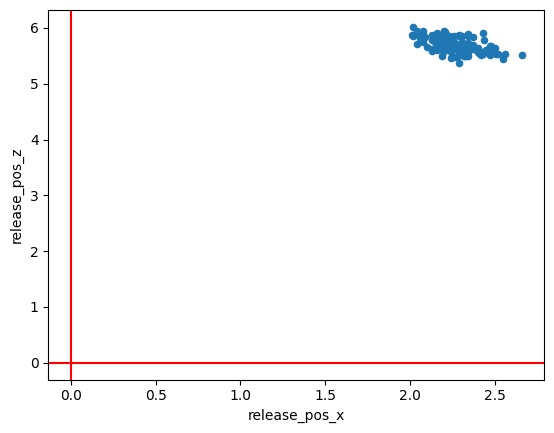

In [ ]:
# plot arm angle for kumar rocker using release_pos_x and z

rock_df = rel_df[rel_df['player_name'] == 'Rocker, Kumar']
rock_df

# plot arm angle with release pos and draw a line to the origin

rock_df.plot(x='release_pos_x',y='release_pos_z',kind='scatter')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')

In [ ]:
# Assuming 'player_name', 'game_date', 'release_pos_x', 'release_pos_z', and 'inning' columns exist in rel_df

# Group by 'player_name' and 'game_date', calculate the mean for release_pos_x and release_pos_z,
# and get the latest (max) inning for each player on that date. Use 'first' for other columns to retain them.
date_grouped_df = rel_df.groupby(['player_name', 'game_date']).agg({
    'release_pos_x': 'mean',
    'release_pos_z': 'mean',
    'inning': 'max',  # Get the latest inning (highest value)
    'team': 'first',  # Example of keeping the team column, you can apply 'first' or another function
    # Add other columns you want to keep similarly
     # Replace 'other_column' with any other columns you need
}).reset_index()

# Display the grouped dataframe

date_grouped_df


,player_name,game_date,release_pos_x,release_pos_z,inning,team
0,"Abbott, Andrew",2024-04-01,-1.778222,5.938222,6,CIN
1,"Abbott, Andrew",2024-04-07,-1.776632,5.917579,5,CIN
2,"Abbott, Andrew",2024-04-12,-1.713592,5.900000,7,CIN
3,"Abbott, Andrew",2024-04-17,-1.594615,5.768269,6,CIN
4,"Abbott, Andrew",2024-04-23,-1.622025,5.872405,5,CIN
...,...,...,...,...,...,...
19440,"de Geus, Brett",2024-08-17,1.171818,5.900000,7,MIA
19441,"de Geus, Brett",2024-08-19,1.318750,5.936875,6,MIA
19442,"de Geus, Brett",2024-08-23,1.287000,5.904500,8,MIA
19443,"de Geus, Brett",2024-08-24,1.297500,5.878750,8,MIA


In [ ]:
# Use the '&' operator to combine boolean conditions and filter the DataFrame
cin_df = date_grouped_df[(date_grouped_df['player_name'] == 'Pennington, Walter')]
cin_df

,player_name,game_date,release_pos_x,release_pos_z,inning,team,arm_angle
13438,"Pennington, Walter",2024-07-05,-3.165000,5.786250,8,KC,-28.678059
13439,"Pennington, Walter",2024-08-04,-3.160303,5.861212,6,TEX,-28.333072
13440,"Pennington, Walter",2024-08-12,-3.168182,5.735455,10,TEX,-28.915623
13441,"Pennington, Walter",2024-08-13,-3.245862,5.716207,7,TEX,-29.589425
13442,"Pennington, Walter",2024-08-15,-3.258182,5.905455,8,TEX,-28.886582
13443,"Pennington, Walter",2024-08-17,-3.243333,5.831333,9,TEX,-29.082405
13444,"Pennington, Walter",2024-08-24,-3.234200,5.753800,5,TEX,-29.340258
13445,"Pennington, Walter",2024-08-30,-3.314545,5.722727,6,TEX,-30.078986
13446,"Pennington, Walter",2024-09-01,-3.402000,5.740500,2,TEX,-30.652309
13447,"Pennington, Walter",2024-09-03,-3.338333,5.696667,9,TEX,-30.370952


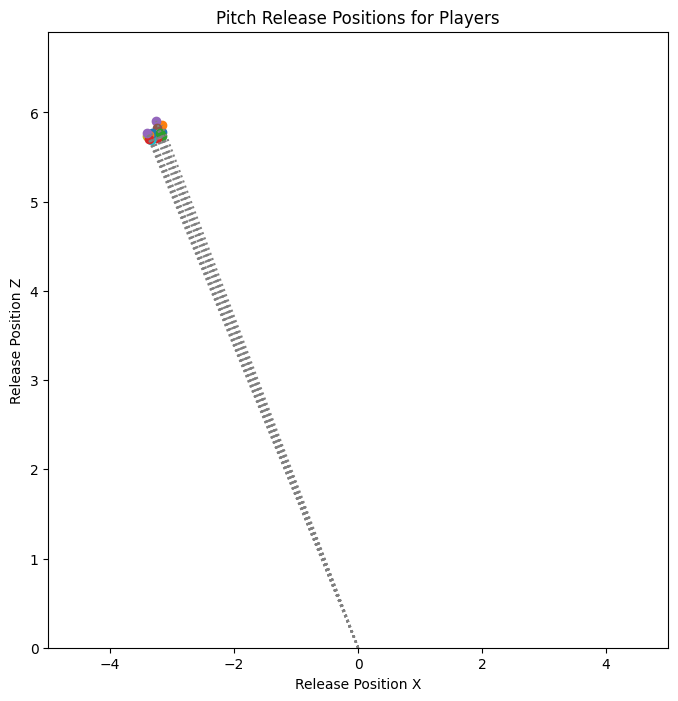

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'player_name', 'release_pos_x', and 'release_pos_z' columns exist in cin_df

# Create a figure and axis
plt.figure(figsize=(8, 8))
ax = plt.gca()

# Set y-limits starting at 0
ax.set_ylim([0, cin_df['release_pos_z'].max() + 1])
ax.set_xlim([-5,5])

# Plot each player's release point and draw a dotted line from the origin to the release point
for index, row in cin_df.iterrows():
    release_x = row['release_pos_x']
    release_z = row['release_pos_z']
    player = row['player_name']

    # Plot the release point
    ax.scatter(release_x, release_z, label=player)

    # Draw a dotted line from the origin (0, 0) to the release point
    ax.plot([0, release_x], [0, release_z], linestyle=':', color='gray')

# Set axis labels and title
ax.set_xlabel('Release Position X')
ax.set_ylabel('Release Position Z')
plt.title('Pitch Release Positions for Players')

# Optionally add a legend


# Show the plot
plt.show()


In [ ]:
date_grouped_df

,player_name,game_date,release_pos_x,release_pos_z,inning,team
0,"Abbott, Andrew",2024-04-01,-1.778222,5.938222,6,CIN
1,"Abbott, Andrew",2024-04-07,-1.776632,5.917579,5,CIN
2,"Abbott, Andrew",2024-04-12,-1.713592,5.900000,7,CIN
3,"Abbott, Andrew",2024-04-17,-1.594615,5.768269,6,CIN
4,"Abbott, Andrew",2024-04-23,-1.622025,5.872405,5,CIN
...,...,...,...,...,...,...
19440,"de Geus, Brett",2024-08-17,1.171818,5.900000,7,MIA
19441,"de Geus, Brett",2024-08-19,1.318750,5.936875,6,MIA
19442,"de Geus, Brett",2024-08-23,1.287000,5.904500,8,MIA
19443,"de Geus, Brett",2024-08-24,1.297500,5.878750,8,MIA


In [ ]:
import numpy as np

# Assuming 'release_pos_x' and 'release_pos_z' are present in date_grouped_df

# Function to calculate the arm angle in degrees
def calculate_arm_angle(row):
    # Calculate the angle in radians using arctangent of x and z
    angle_radians = np.arctan2(row['release_pos_x'], row['release_pos_z'])
    # Convert the angle to degrees
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees

# Apply the function to each row to calculate the arm angle
date_grouped_df['arm_angle'] = date_grouped_df.apply(calculate_arm_angle, axis=1)

# Display the updated dataframe with the new 'arm_angle' column
date_grouped_df


,player_name,game_date,release_pos_x,release_pos_z,inning,team,arm_angle
0,"Abbott, Andrew",2024-04-01,-1.778222,5.938222,6,CIN,-16.670520
1,"Abbott, Andrew",2024-04-07,-1.776632,5.917579,5,CIN,-16.711305
2,"Abbott, Andrew",2024-04-12,-1.713592,5.900000,7,CIN,-16.195377
3,"Abbott, Andrew",2024-04-17,-1.594615,5.768269,6,CIN,-15.453251
4,"Abbott, Andrew",2024-04-23,-1.622025,5.872405,5,CIN,-15.440760
...,...,...,...,...,...,...,...
19440,"de Geus, Brett",2024-08-17,1.171818,5.900000,7,MIA,11.233513
19441,"de Geus, Brett",2024-08-19,1.318750,5.936875,6,MIA,12.523698
19442,"de Geus, Brett",2024-08-23,1.287000,5.904500,8,MIA,12.296395
19443,"de Geus, Brett",2024-08-24,1.297500,5.878750,8,MIA,12.446225


In [ ]:
# Step 1: Calculate the average 'estimated_woba_using_speedangle' from the original dataframe
avg_woba_df = rel_df.groupby(['player_name', 'game_date'])['estimated_woba_using_speedangle'].mean().reset_index()

# Step 2: Merge the new avg_woba_df with the existing date_grouped_df
date_grouped_df_with_woba = date_grouped_df.merge(avg_woba_df, on=['player_name', 'game_date'], how='left')

# Display the updated dataframe with the new 'avg_estimated_woba_using_speedangle' column
date_grouped_df_with_woba


,player_name,game_date,release_pos_x,release_pos_z,inning,team,arm_angle,estimated_woba_using_speedangle
0,"Abbott, Andrew",2024-04-01,-1.778222,5.938222,6,CIN,-16.670520,0.243876
1,"Abbott, Andrew",2024-04-07,-1.776632,5.917579,5,CIN,-16.711305,0.313244
2,"Abbott, Andrew",2024-04-12,-1.713592,5.900000,7,CIN,-16.195377,0.317708
3,"Abbott, Andrew",2024-04-17,-1.594615,5.768269,6,CIN,-15.453251,0.284264
4,"Abbott, Andrew",2024-04-23,-1.622025,5.872405,5,CIN,-15.440760,0.314569
...,...,...,...,...,...,...,...,...
19440,"de Geus, Brett",2024-08-17,1.171818,5.900000,7,MIA,11.233513,0.051000
19441,"de Geus, Brett",2024-08-19,1.318750,5.936875,6,MIA,12.523698,0.520067
19442,"de Geus, Brett",2024-08-23,1.287000,5.904500,8,MIA,12.296395,0.309200
19443,"de Geus, Brett",2024-08-24,1.297500,5.878750,8,MIA,12.446225,0.409600


In [ ]:
# Create a boolean mask for the game_date
date_mask = date_grouped_df_with_woba['game_date'] == '2024-09-13'

# Create a boolean mask for the team
team_mask = date_grouped_df_with_woba['team'] == 'SEA'

# Combine the masks using the logical AND operator
date_df = date_grouped_df_with_woba[date_mask & team_mask]

date_df

,player_name,game_date,release_pos_x,release_pos_z,inning,team,arm_angle,estimated_woba_using_speedangle_x,estimated_woba_using_speedangle_y,estimated_woba_using_speedangle
15475,"Hancock, Emerson",2024-09-13,1.623556,5.685889,5,SEA,15.936227,0.342358,0.342358,0.342358
15476,"Thornton, Trent",2024-09-13,2.408889,5.325556,6,SEA,24.338491,0.147333,0.147333,0.147333
15477,"Saucedo, Tayler",2024-09-13,-2.045714,5.384286,7,SEA,-20.803869,0.262000,0.262000,0.262000
15478,"Voth, Austin",2024-09-13,2.509524,5.641905,7,SEA,23.979537,0.535350,0.535350,0.535350
15479,"Chargois, JT",2024-09-13,1.571429,5.342857,8,SEA,16.389540,0.000000,0.000000,0.000000
15480,"Muñoz, Andrés",2024-09-13,1.742500,5.357500,9,SEA,18.016856,0.100667,0.100667,0.100667


In [ ]:
import numpy as np

# Sort by inning so we can compute the next pitcher info in the correct order
date_df = date_df.sort_values(by='inning').reset_index(drop=True)

# Step 1: Calculate the difference in arm angle between the current pitcher and the next one
date_df['next_arm_angle'] = date_df['arm_angle'].shift(-1)  # Shift to get the next pitcher's arm angle
date_df['arm_angle_diff'] = date_df['arm_angle'] - date_df['next_arm_angle']  # Difference in arm angles
date_df['arm_angle_diff'] = date_df['arm_angle_diff'].round()  # Round to the nearest whole number

# Step 2: Calculate the xwOBA of the next pitcher
date_df['next_xwoba'] = date_df['estimated_woba_using_speedangle'].shift(-1)  # Shift to get next pitcher's xwOBA

# Display the resulting dataframe
print(date_df[['player_name', 'inning', 'arm_angle', 'next_arm_angle', 'arm_angle_diff', 'estimated_woba_using_speedangle', 'next_xwoba']])


        player_name  inning  arm_angle  next_arm_angle  arm_angle_diff  \
0  Hancock, Emerson       5  15.936227       24.338491            -8.0   
1   Thornton, Trent       6  24.338491      -20.803869            45.0   
2   Saucedo, Tayler       7 -20.803869       23.979537           -45.0   
3      Voth, Austin       7  23.979537       16.389540             8.0   
4      Chargois, JT       8  16.389540       18.016856            -2.0   
5     Muñoz, Andrés       9  18.016856             NaN             NaN   

   estimated_woba_using_speedangle  next_xwoba  
0                         0.342358    0.147333  
1                         0.147333    0.262000  
2                         0.262000    0.535350  
3                         0.535350    0.000000  
4                         0.000000    0.100667  
5                         0.100667         NaN  


In [ ]:
import numpy as np
import pandas as pd

# Assuming you have a full dataset 'date_grouped_df_with_woba'

# Step 1: Define a function to calculate arm angle differences and next pitcher's xwOBA for each game/team group
def calculate_differences(df):
    # Sort by inning so we can compute the next pitcher info in the correct order
    df = df.sort_values(by='inning').reset_index(drop=True)

    # Calculate the difference in arm angle between the current pitcher and the next one
    df['next_arm_angle'] = df['arm_angle'].shift(-1)  # Get the next pitcher's arm angle
    df['arm_angle_diff'] = df['arm_angle'] - df['next_arm_angle']  # Calculate arm angle difference
    df['arm_angle_diff'] = df['arm_angle_diff'].round()  # Round to the nearest whole number

    # Calculate the xwOBA of the next pitcher
    df['next_xwoba'] = df['estimated_woba_using_speedangle'].shift(-1)  # Get next pitcher's xwOBA

    return df

# Step 2: Group by 'game_date' and 'team', and apply the function to each group
result_df = date_grouped_df_with_woba.groupby(['game_date', 'team'], group_keys=False).apply(calculate_differences)

# Step 3: Display the relevant columns for analysis
print(result_df[['game_date', 'team', 'player_name', 'inning', 'arm_angle', 'next_arm_angle', 'arm_angle_diff', 'estimated_woba_using_speedangle', 'next_xwoba']])


     game_date team      player_name  inning  arm_angle  next_arm_angle  \
0   2024-03-28   AZ      Gallen, Zac       5  28.264132       14.908532   
1   2024-03-28   AZ   McGough, Scott       6  14.908532       24.530389   
2   2024-03-28   AZ   Castro, Miguel       7  24.530389       -7.431408   
3   2024-03-28   AZ     Nelson, Kyle       8  -7.431408        9.833909   
4   2024-03-28   AZ      Frías, Luis       9   9.833909             NaN   
..         ...  ...              ...     ...        ...             ...   
4   2024-09-19  TOR      Green, Chad       9  15.890900             NaN   
0   2024-09-19  WSH  Corbin, Patrick       5 -21.447502        7.533482   
1   2024-09-19  WSH       Law, Derek       6   7.533482      -33.562296   
2   2024-09-19  WSH   Garcia, Robert       7 -33.562296      -25.286675   
3   2024-09-19  WSH  Ferrer, Jose A.       8 -25.286675             NaN   

    arm_angle_diff  estimated_woba_using_speedangle  next_xwoba  
0             13.0               

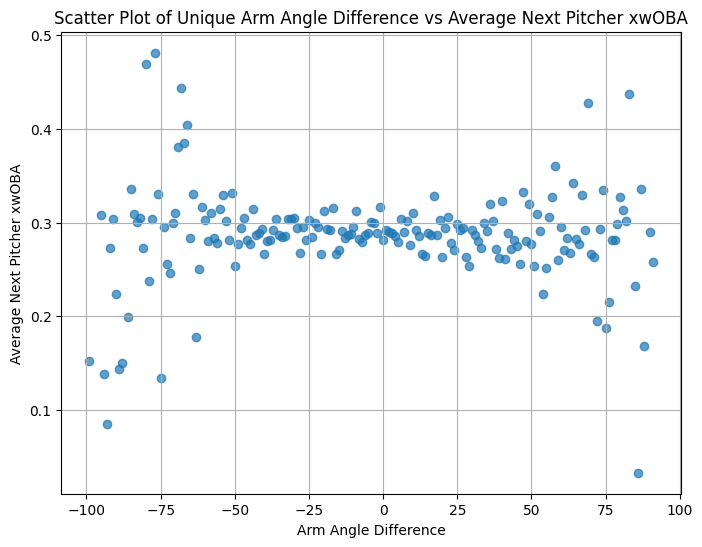

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter out rows where next_xwoba or arm_angle_diff is NaN
plot_df = result_df.dropna(subset=['arm_angle_diff', 'next_xwoba'])

# Step 2: Group by 'arm_angle_diff' and calculate the mean of 'next_xwoba'
grouped_df = plot_df.groupby('arm_angle_diff')['next_xwoba'].mean().reset_index()

# Step 3: Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(grouped_df['arm_angle_diff'], grouped_df['next_xwoba'], alpha=0.7)

# Step 4: Set labels and title
plt.xlabel('Arm Angle Difference')
plt.ylabel('Average Next Pitcher xwOBA')
plt.title('Scatter Plot of Unique Arm Angle Difference vs Average Next Pitcher xwOBA')

# Optional: Add a grid for better visibility
plt.grid(True)

# Step 5: Show the plot
plt.show()


<ipython-input-106-b37b499478a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['arm_angle_rounded'] = plot_df['arm_angle'].round()


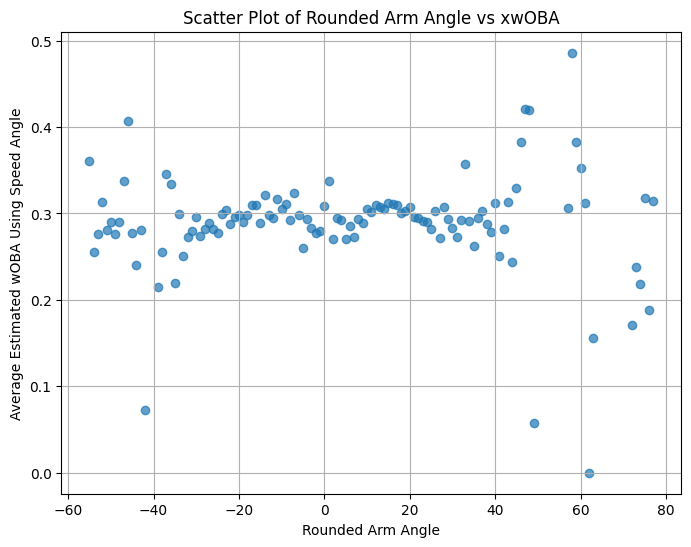

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter out rows where arm_angle or estimated_woba_using_speedangle is NaN
plot_df = result_df.dropna(subset=['arm_angle', 'estimated_woba_using_speedangle'])

# Step 2: Round arm_angle to the nearest whole number and group by 'arm_angle', calculate the mean of 'estimated_woba_using_speedangle'
plot_df['arm_angle_rounded'] = plot_df['arm_angle'].round()
grouped_df = plot_df.groupby('arm_angle_rounded')['estimated_woba_using_speedangle'].mean().reset_index()

# Step 3: Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(grouped_df['arm_angle_rounded'], grouped_df['estimated_woba_using_speedangle'], alpha=0.7)

# Step 4: Set labels and title
plt.xlabel('Rounded Arm Angle')
plt.ylabel('Average Estimated wOBA Using Speed Angle')
plt.title('Scatter Plot of Rounded Arm Angle vs xwOBA
')

# Optional: Add a grid for better visibility
plt.grid(True)

# Step 5: Show the plot
plt.show()


<ipython-input-111-55af73fb5a14>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['abs_arm_angle_diff'] = plot_df['arm_angle_diff'].abs()


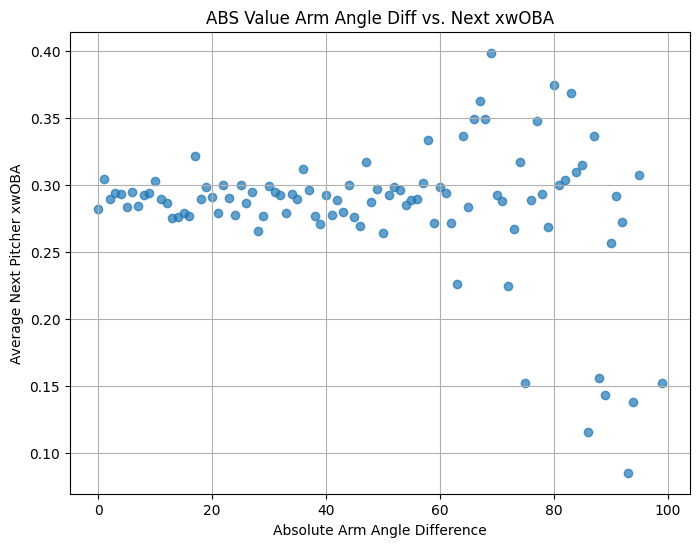

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter out rows where next_xwoba or arm_angle_diff is NaN
plot_df = result_df.dropna(subset=['arm_angle_diff', 'next_xwoba'])

# Step 2: Take the absolute value of 'arm_angle_diff'
plot_df['abs_arm_angle_diff'] = plot_df['arm_angle_diff'].abs()

# Step 3: Group by 'abs_arm_angle_diff' and calculate the mean of 'next_xwoba'
grouped_df = plot_df.groupby('abs_arm_angle_diff')['next_xwoba'].mean().reset_index()

# Step 4: Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(grouped_df['abs_arm_angle_diff'], grouped_df['next_xwoba'], alpha=0.7)

# Step 5: Set labels and title
plt.xlabel('Absolute Arm Angle Difference')
plt.ylabel('Average Next Pitcher xwOBA')
plt.title('ABS Value Arm Angle Diff vs. Next xwOBA')

# Optional: Add a grid for better visibility
plt.grid(True)

# Step 6: Show the plot
plt.show()


<ipython-input-110-453475c8e5ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['arm_angle_abs_rounded'] = plot_df['arm_angle'].abs().round()


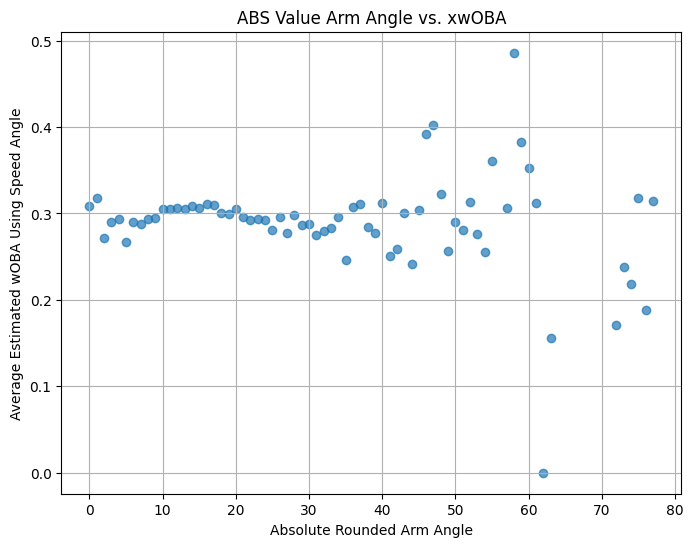

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter out rows where arm_angle or estimated_woba_using_speedangle is NaN
plot_df = result_df.dropna(subset=['arm_angle', 'estimated_woba_using_speedangle'])

# Step 2: Take the absolute value of arm_angle, round it to the nearest whole number, and group by 'arm_angle_rounded'
plot_df['arm_angle_abs_rounded'] = plot_df['arm_angle'].abs().round()
grouped_df = plot_df.groupby('arm_angle_abs_rounded')['estimated_woba_using_speedangle'].mean().reset_index()

# Step 3: Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(grouped_df['arm_angle_abs_rounded'], grouped_df['estimated_woba_using_speedangle'], alpha=0.7)

# Step 4: Set labels and title
plt.xlabel('Absolute Rounded Arm Angle')
plt.ylabel('Average Estimated wOBA Using Speed Angle')
plt.title('ABS Value Arm Angle vs. xwOBA')

# Optional: Add a grid for better visibility
plt.grid(True)

# Step 5: Show the plot
plt.show()
